In [88]:
import networkx as nx
import matplotlib.pyplot as plt

class NodeB:
    def __init__(self, dato, right=None, left=None):
        self.dato = dato
        self.right = right
        self.left = left
    
    def __lt__(self, other):
        return self.dato <  other.dato
    def __le__(self, other):
        return self.dato <= other.dato
    def __eq__(self, other):
        return self.dato == other.dato
    def __gt__(self, other):
        return self.dato >  other.dato
    def __ge__(self, dato):
        return self.dato >= other.dato
    
    def nodeDict(self):
        if(self.left is None and self.right is None):
            return {}
        elif(self.left is None):
            return {str(self.dato):{str(self.right.dato):{}}}
        elif(self.right is None):
            return {str(self.dato):{str(self.left.dato):{}}}
        else:
            return {str(self.dato):{str(self.left.dato):{}, str(self.right.dato):{}}}
    
    def dataFrameMe(self):
        resp = {}
        if(self.right is not None):
            resp.update(self.right.dataFrameMe())
        if(self.left  is not None):
            resp.update(self.left.dataFrameMe())
        resp.update(self.nodeDict())
        return resp
    
    def __str__(self, level=0):
        resp = "\t" * level + "nivel: " + str(level) + " dato:" + str(self.dato) + "\n"
        
        if(self.right is not None):
            resp += "\t" * (level) + "Nodo Derecho  : \n" + self.right.__str__(level+1) + "\n"
        if(self.left is not None):
            resp += "\t" * (level) + "Nodo Izquierdo: \n" + self.left.__str__(level+1)
            
        return resp
    

In [211]:
class ArbolB:
    def __init__(self, root = None):
        self.root = root
    
    def draw(self):
        myDict = self.root.dataFrameMe()
        grafo = nx.Graph(myDict)
        profundidades = {}
        listaProf = []
        for nodo in grafo.nodes():
            nodoInfo = self.find(int(nodo))
            profundidad = len(nodoInfo['pasos'])
            listaProf.append(profundidad)
            profundidades[nodo] = profundidad
        nx.set_node_attributes(grafo, profundidades, 'depth')
        nx.draw_kamada_kawai(grafo, with_labels = True, node_size=1500,
                            node_color = listaProf,
                            cmap = plt.cm.Reds)
        plt.show()


    def find(self, dato):
        return self.__findR(dato, self.root, [])
    
    def __findR(self, dato, currentNode, resp=[], pastNode = None):
        if(currentNode is None): return False
        if(currentNode.dato == dato): return {'pasos':resp, 'nodo':currentNode, 'nodoAnt':pastNode}
        
        if(currentNode.dato < dato):
            resp.append('r')
            return self.__findR(dato, currentNode.right, resp = resp, pastNode=currentNode)
        elif(currentNode.dato > dato):
            resp.append('l')
            return self.__findR(dato, currentNode.left, resp = resp, pastNode=currentNode)
    
    def findPrev(self, nodo):
        if(nodo.right is None): return None
        else:
            nodo = nodo.right
            while(nodo.left is not None):
                nodo = nodo.left
        return nodo
    
    def insert(self, dato):
        newNode = NodeB(dato)
        if(self.root is None): self.root = newNode
        elif(self.root < newNode): 
            if(self.root.right is not None):
                self.__insertR(newNode, self.root.right)
            else:
                self.root.right = newNode
        
        elif(self.root > newNode):
            if(self.root.left is not None):
                self.__insertR(newNode, self.root.left)
            else:
                self.root.left = newNode
        #else:#Handle repeated node    
    
    def __insertR(self, newNode, treeNode):
        
        if(treeNode < newNode):
            if(treeNode.right is None):
                treeNode.right = newNode
            else:
                self.__insertR(newNode, treeNode.right)
        elif(treeNode > newNode):
            if(treeNode.left is None):
                treeNode.left = newNode
            else:
                self.__insertR(newNode, treeNode.left)
        #else: #Handle repeated node    
        
    def delete(self, dato):
        info = self.find(dato)
        if(info):#Si se encontro el dato a quitar
            if((info['nodo'].left is None) and (info['nodo'].right is None)):#El nodo a quitar no tiene hijos
                if(info['pasos']==[]): self.root = None #Es la raíz
                elif(info['pasos'][-1] == 'r'): info['nodoAnt'].right = None 
                elif(info['pasos'][-1] == 'l'): info['nodoAnt'].left = None
                        
            elif(info['nodo'].left is not None and info['nodo'].right is not None):#el nodo a quitar tiene 2 hijos
                prev = self.findPrev(info['nodo'])
                info['nodo'].dato = prev.dato
                ArbolB(info['nodo'].right).delete(prev.dato)
                
            else: # solamente tiene un hijo
                if(info['pasos']==[]): 
                    self.root = info['nodo'].right or info['nodo'].left #Es la raíz
                elif(info['pasos'][-1] == 'r'):
                        info['nodoAnt'].right = info['nodo'].right or info['nodo'].left 
                elif(info['pasos'][-1] == 'l'):
                        info['nodoAnt'].left = info['nodo'].right or info['nodo'].left
            
        
    
    
    def __str__(self):
        return "Árbol: " + str(self.root)

In [212]:
miarbol = ArbolB()

In [213]:
miarbol.insert(70)
miarbol.insert(50)
miarbol.insert(100)
miarbol.insert(30)
miarbol.insert(60)
miarbol.insert(80)
miarbol.insert(115)
miarbol.insert(20)
miarbol.insert(40)
miarbol.insert(65)
miarbol.insert(75)
miarbol.insert(87)
miarbol.insert(112)
miarbol.insert(35)
miarbol.insert(63)
miarbol.insert(68)
miarbol.insert(67)


Árbol: nivel: 0 dato:70
Nodo Derecho  : 
	nivel: 1 dato:100
	Nodo Derecho  : 
		nivel: 2 dato:115
		Nodo Izquierdo: 
			nivel: 3 dato:112

	Nodo Izquierdo: 
		nivel: 2 dato:80
		Nodo Derecho  : 
			nivel: 3 dato:87

		Nodo Izquierdo: 
			nivel: 3 dato:75

Nodo Izquierdo: 
	nivel: 1 dato:50
	Nodo Derecho  : 
		nivel: 2 dato:60
		Nodo Derecho  : 
			nivel: 3 dato:65
			Nodo Derecho  : 
				nivel: 4 dato:68
				Nodo Izquierdo: 
					nivel: 5 dato:67

			Nodo Izquierdo: 
				nivel: 4 dato:63


	Nodo Izquierdo: 
		nivel: 2 dato:30
		Nodo Derecho  : 
			nivel: 3 dato:40
			Nodo Izquierdo: 
				nivel: 4 dato:35

		Nodo Izquierdo: 
			nivel: 3 dato:20



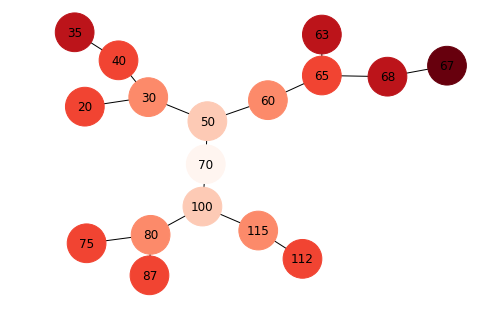

In [214]:
print(miarbol)
miarbol.draw()

Árbol: nivel: 0 dato:75
Nodo Derecho  : 
	nivel: 1 dato:100
	Nodo Derecho  : 
		nivel: 2 dato:115
		Nodo Izquierdo: 
			nivel: 3 dato:112

	Nodo Izquierdo: 
		nivel: 2 dato:80
		Nodo Derecho  : 
			nivel: 3 dato:87


Nodo Izquierdo: 
	nivel: 1 dato:50
	Nodo Derecho  : 
		nivel: 2 dato:60
		Nodo Derecho  : 
			nivel: 3 dato:65
			Nodo Derecho  : 
				nivel: 4 dato:68
				Nodo Izquierdo: 
					nivel: 5 dato:67

			Nodo Izquierdo: 
				nivel: 4 dato:63


	Nodo Izquierdo: 
		nivel: 2 dato:30
		Nodo Derecho  : 
			nivel: 3 dato:40
			Nodo Izquierdo: 
				nivel: 4 dato:35

		Nodo Izquierdo: 
			nivel: 3 dato:20



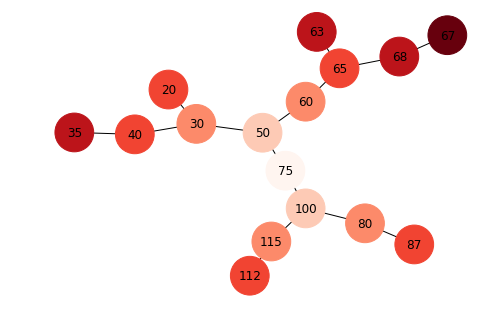

In [215]:
miarbol.delete(70)
print(miarbol)
miarbol.draw()

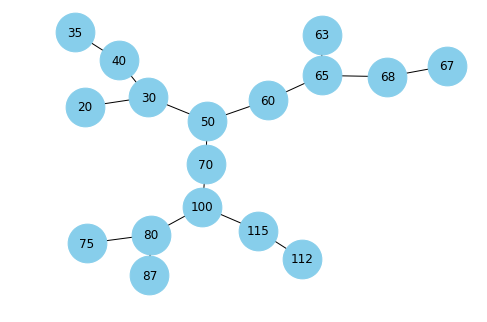

In [86]:
nx.draw_kamada_kawai(grafo, with_labels = True, node_size=1500,node_color="skyblue")
plt.show()

In [134]:
len([1])

1

In [182]:
print(miarbol.find(40))

{'pasos': ['r', 'r', 'r', 'l', 'r', 'l', 'r', 'r', 'r', 'l', 'r', 'r', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'l', 'r', 'r', 'l', 'r', 'l', 'l', 'r', 'l', 'r', 'l', 'r', 'r', 'r', 'l', 'l', 'r', 'r', 'l', 'l', 'l', 'r', 'l', 'l', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r', 'l', 'l', 'r'], 'nodo': <__main__.NodeB object at 0x7facf1964c88>, 'nodoAnt': <__main__.NodeB object at 0x7facf1964f98>}


In [146]:
)

SyntaxError: invalid syntax (<ipython-input-146-2443f86f4c4d>, line 1)

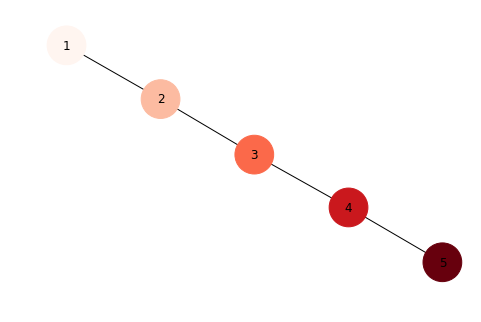

{'4': 3, '3': 2, '2': 1, '1': 0, '5': 4}


In [209]:
arbol2 = ArbolB()
arbol2.insert(1)
arbol2.insert(2)
arbol2.insert(3)
arbol2.insert(4)
arbol2.insert(5)
arbol2.draw()

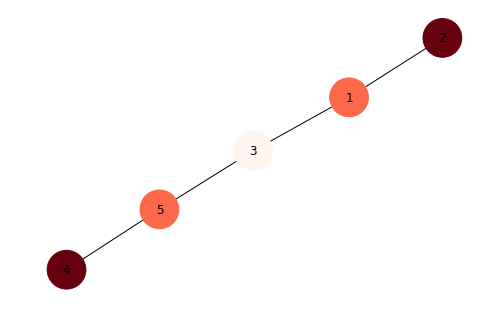

{'5': 1, '1': 1, '3': 0, '4': 2, '2': 2}


In [210]:
arbol3 = ArbolB()
arbol3.insert(3)
arbol3.insert(1)
arbol3.insert(5)
arbol3.insert(2)
arbol3.insert(4)
arbol3.draw()